In [15]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import tensorflow as tf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt, matplotlib.image as mpimg
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

(-51796.588449389972, 500000, 0.0, 9.18822157500956e-06)

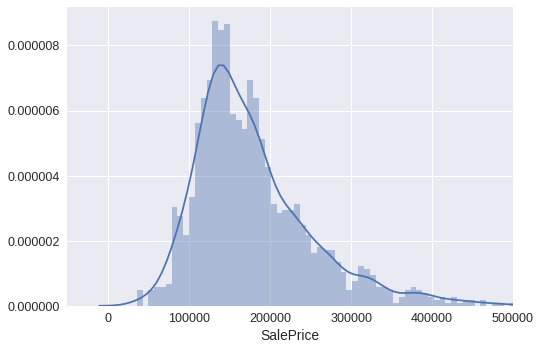

In [60]:
var = "SalePrice"
X = sns.distplot(a=df_train[var], bins=100);
X.axis(xmax=500000)

In [27]:
print("Skewness", df_train[var].skew())
print("Kurtosis", df_train[var].kurt())

Skewness:  1.88287575977
Kurtosis:  6.53628186006


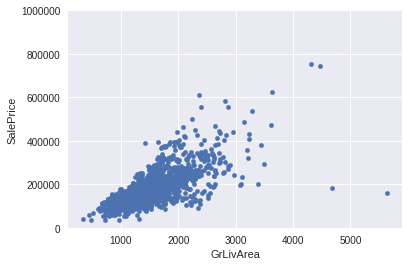

In [30]:
var1 = "GrLivArea"
data = pd.concat([df_train[var], df_train[var1]], axis=1)
data.plot.scatter(x=var1, y=var, ylim=(0,1000000))

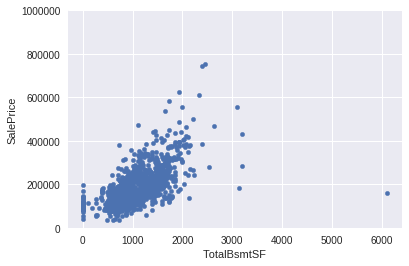

In [34]:
var1 = "TotalBsmtSF"
data = pd.concat([df_train[var], df_train[var1]], axis=1)
data.plot.scatter(x=var1, y=var, ylim=(0,1000000))

(-0.5, 9.5, 0, 1000000)

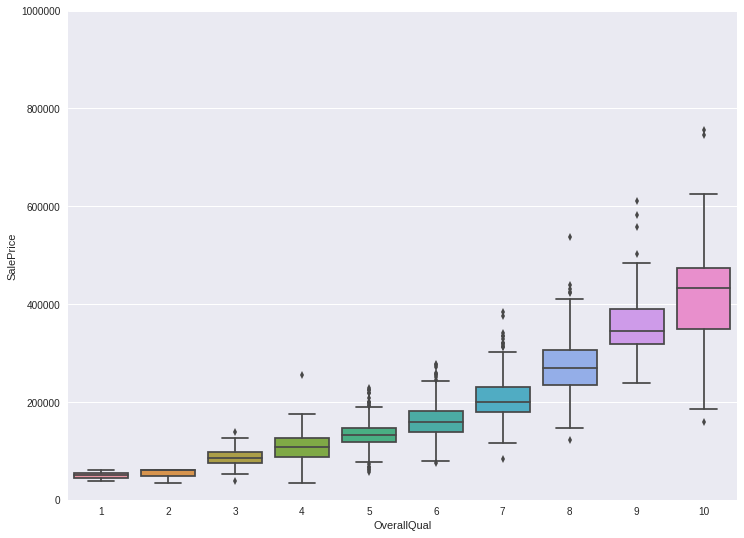

In [42]:
var1 = "OverallQual"
data = pd.concat([df_train[var], df_train[var1]], axis=1)
plt.subplots(figsize=(12,9))
fig = sns.boxplot(x=var1, y=var, data=data)
fig.axis(ymin = 0, ymax = 1000000)

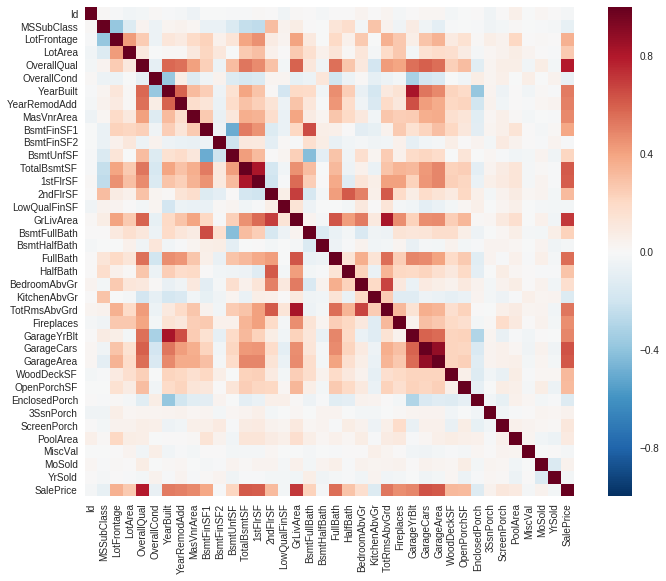

In [46]:
corrmat = df_train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=1,square=True)

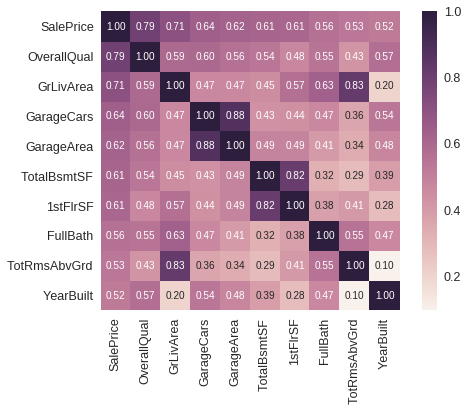

In [70]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
#plt.show()

In [76]:
np.corrcoef(df_train[cols].values.T)

array([[ 1.        ,  0.7909816 ,  0.70862448,  0.6404092 ,  0.62343144,
         0.61358055,  0.60585218,  0.56066376,  0.53372316,  0.52289733],
       [ 0.7909816 ,  1.        ,  0.59300743,  0.60067072,  0.56202176,
         0.5378085 ,  0.47622383,  0.55059971,  0.42745234,  0.57232277],
       [ 0.70862448,  0.59300743,  1.        ,  0.46724742,  0.46899748,
         0.4548682 ,  0.56602397,  0.63001165,  0.82548937,  0.19900971],
       [ 0.6404092 ,  0.60067072,  0.46724742,  1.        ,  0.88247541,
         0.43458483,  0.43931681,  0.46967204,  0.36228857,  0.53785009],
       [ 0.62343144,  0.56202176,  0.46899748,  0.88247541,  1.        ,
         0.48666546,  0.48978165,  0.40565621,  0.33782212,  0.47895382],
       [ 0.61358055,  0.5378085 ,  0.4548682 ,  0.43458483,  0.48666546,
         1.        ,  0.81952998,  0.32372241,  0.28557256,  0.391452  ],
       [ 0.60585218,  0.47622383,  0.56602397,  0.43931681,  0.48978165,
         0.81952998,  1.        ,  0.38063749

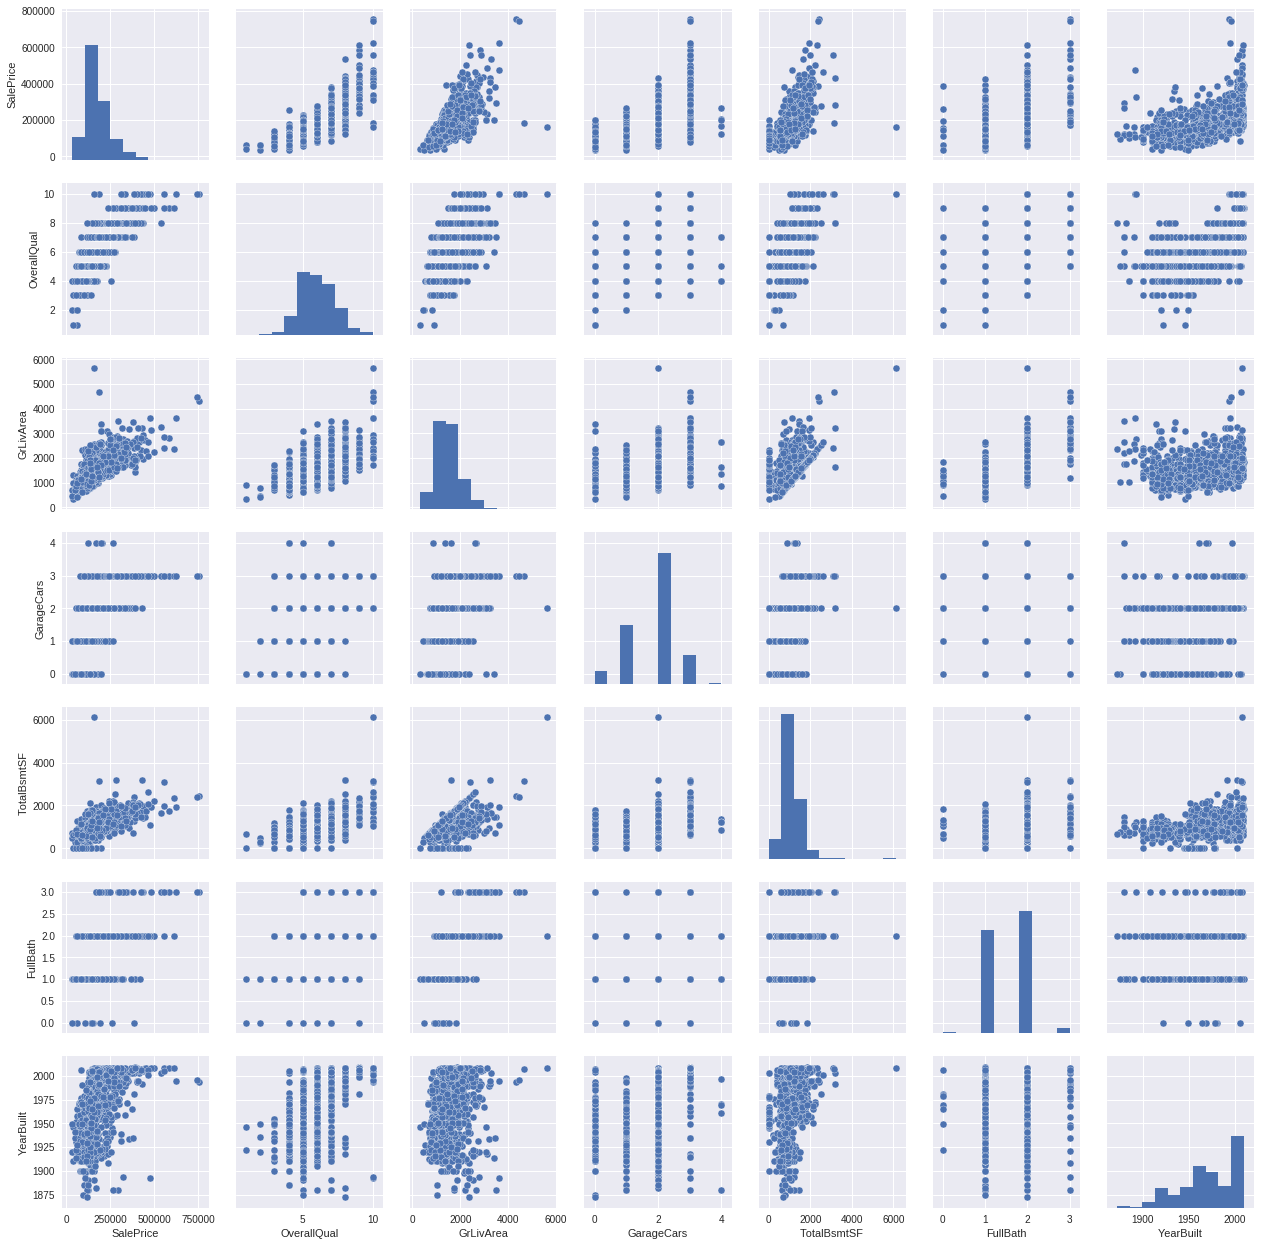

In [77]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();